In [ ]:
!unzip /content/train_data600.zip -d ./
!unzip /content/train_data1200.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./train_data1200/train_data5499.csv  
  inflating: ./train_data1200/train_data55.csv  
  inflating: ./train_data1200/train_data550.csv  
  inflating: ./train_data1200/train_data5500.csv  
  inflating: ./train_data1200/train_data5501.csv  
  inflating: ./train_data1200/train_data5502.csv  
  inflating: ./train_data1200/train_data5503.csv  
  inflating: ./train_data1200/train_data5504.csv  
  inflating: ./train_data1200/train_data5505.csv  
  inflating: ./train_data1200/train_data5506.csv  
  inflating: ./train_data1200/train_data5507.csv  
  inflating: ./train_data1200/train_data5508.csv  
  inflating: ./train_data1200/train_data5509.csv  
  inflating: ./train_data1200/train_data551.csv  
  inflating: ./train_data1200/train_data5510.csv  
  inflating: ./train_data1200/train_data5511.csv  
  inflating: ./train_data1200/train_data5512.csv  
  inflating: ./train_data1200/train_data5513.csv  
  inflating: ./train_data1200/train

In [ ]:
import pandas as pd
sample = pd.read_csv('/content/train_data600/train_data21.csv', header = None, names = ['x','y','z'])
sample

,x,y,z
0,-0.572091,0.301380,0.552150
1,-0.469063,-0.028976,-0.382292
2,-0.200513,-0.273481,-0.664767
3,0.148094,-0.229233,-0.474094
4,0.868881,0.112419,-0.087065
...,...,...,...
12495,0.823541,-0.048100,-0.249804
12496,-0.031614,0.199164,0.124885
12497,-0.554638,0.360241,-0.175278
12498,-0.028461,0.308276,-0.576218


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft

In [ ]:
# sample_rate = 1024
# N = (2 - 0) * sample_rate
# freq1 = 60
# magnitude1 = 25
# freq2 = 270
# magnitude2 = 2
# time = np.linspace(0, 2, N)

# waveform1 = magnitude1 * np.sin(2 * pi * freq1 * time)
# waveform2 = magnitude2 * np.sin(2 * pi * freq2 * time)
# noise = np.random.normal (0, 3, N)

# time_data = waveform1 + waveform2 + noise

# len(time_data)

In [ ]:
len(sample['y'])

12500

In [ ]:
sample_rate = 51200
N = int((0.25 - 0) * sample_rate)

time_data = list(sample['x'])

frequency = np.linspace (0.0, 6400, int (N/2))

freq_data = fft(time_data)
y = 2/N * np.abs (freq_data [0:np.int (N/2)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


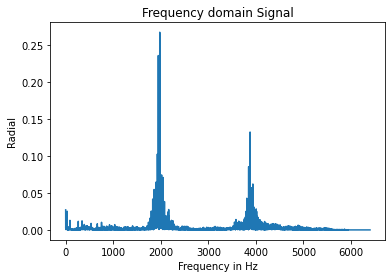

In [ ]:
#X , 200
plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Radial')
plt.show()

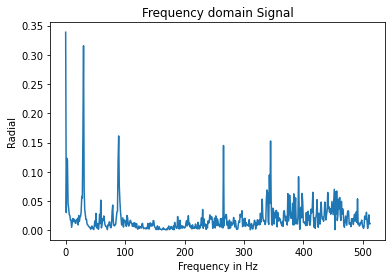

In [ ]:
#X , 500
plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Radial')
plt.show()

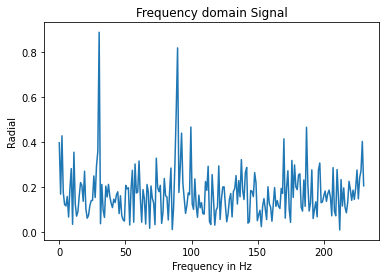

In [ ]:
#Y , 200
plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Radial')
plt.show()

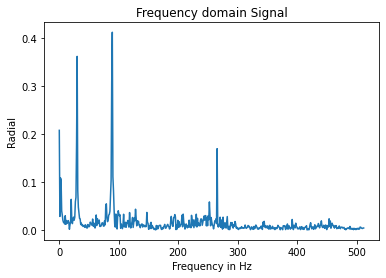

In [ ]:
#Y , 500
plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Radial')
plt.show()

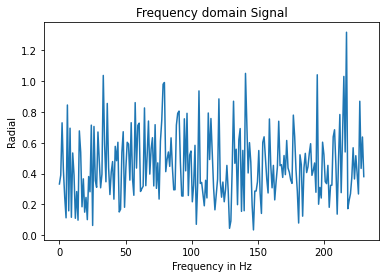

In [ ]:
#z , 200
plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Radial')
plt.show()

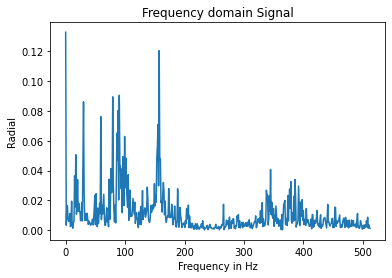

In [ ]:
#z , 500
plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel('Radial')
plt.show()

# DAE

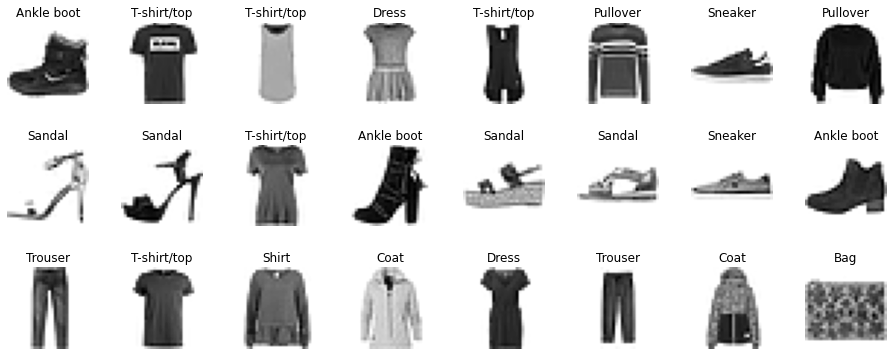

In [ ]:
from keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test, y_test) = load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:] 

targets = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 3
n_cols = 8
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols)  :
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(targets[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

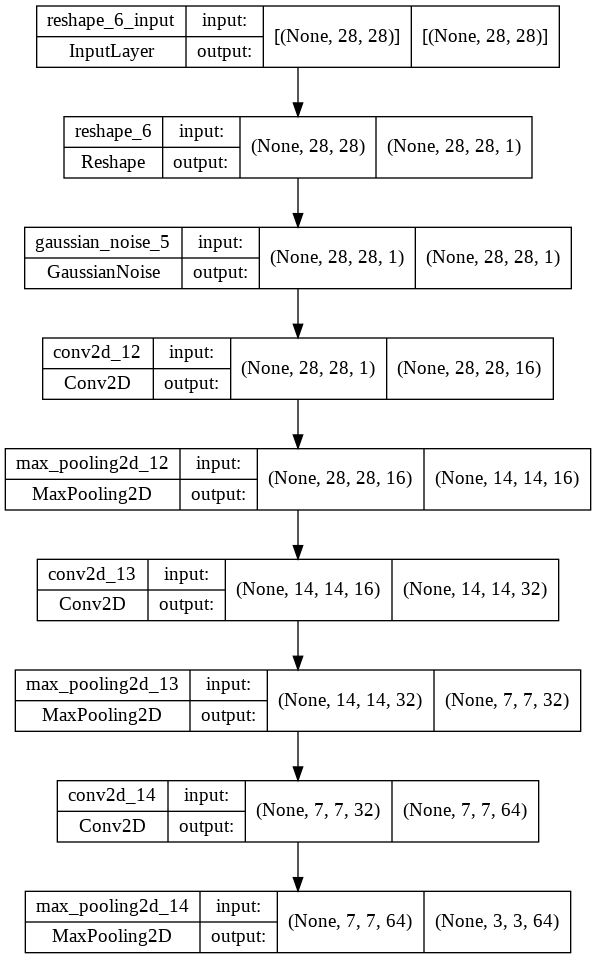

In [ ]:
from keras.layers import Conv2D, MaxPool2D, GaussianNoise, Reshape
from tensorflow.keras.layers import Concatenate, AveragePooling2D, BatchNormalization, Conv2D, Dropout, Conv2DTranspose, Dense, Input, Reshape, Flatten

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

denoising_encoder = Sequential([
    Reshape([28, 28, 1], input_shape=[28, 28]),
    GaussianNoise(0.2),
    Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2),
    Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2),
    Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2)
])

encoder_input = Reshape([28, 28, 1], input_shape=[28, 28])
en_conv = GaussianNoise(0.2)(encoder_input)
en_conv = Conv2D(16, kernel_size=3, padding="SAME", activation="selu")(en_conv)



plot_model(denoising_encoder, to_file='denoising_encoder.png', show_shapes=True)

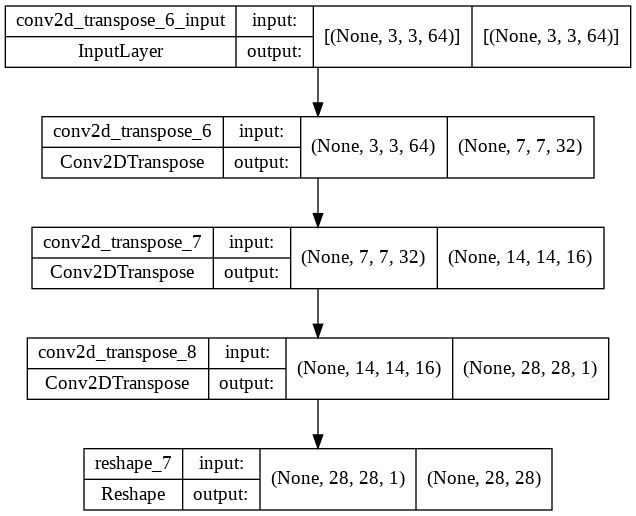

In [ ]:
from keras.layers import Conv2DTranspose

denoising_decoder = Sequential([
    Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    Reshape([28, 28])
])

plot_model(denoising_decoder, to_file='denoising_decoder.png', show_shapes=True)

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
# denoising_ae = Sequential([denoising_encoder, denoising_decoder])
from tensorflow.keras.constraints import max_norm
latent = denoising_encoder([28,28])
decode = denoising_decoder(latent)
x = latent
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(32, activation='relu')(x)
z = Dense(10, activation='softmax', kernel_constraint=max_norm(0.5), 
                        name='classifier')(x)

final = tf.keras.Model(inputs = Input([28,28]), outputs = [decode,latent,z])

# denoising_ae.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.5))
# history = denoising_ae.fit(X_train, X_train, epochs=5,
#                       validation_data=(X_valid, X_valid))

ValueError: ignored

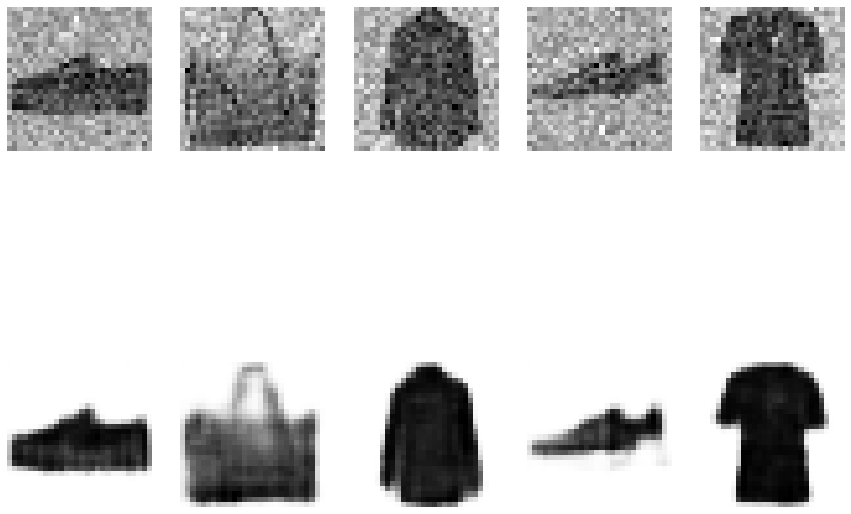

In [ ]:
corrupted_inputs = GaussianNoise(0.2)(X_valid[8:13], training=True)
reconstructs = denoising_ae.predict(corrupted_inputs)
plt.figure(figsize=(15,12))
for i in range(5):
    plt.subplot(2,5,1+i)
    plt.imshow(corrupted_inputs[i], cmap='binary')
    plt.axis('off')
    plt.subplot(2,5,6+i)
    plt.imshow(reconstructs[i], cmap='binary')
    plt.axis('off')
plt.show()